In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
import os
import matplotlib.pyplot as plt
from upsetplot import plot as up_plt
import zipfile

plt.style.use('ggplot')

In [2]:
url_hate_speech = "https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv"
url_spam_detection = "http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/smsspamcollection.zip"
url_fake_news = "https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset/data" # downloaded manually

### Hate Speech and Offensive Language

In [3]:
hate_path = "res/hate-speech/labeled_data.csv"
if os.path.exists(hate_path):
    print("Skipping download")
else:
    _ = urlretrieve(url_hate_speech, hate_path)

Skipping download


In [4]:
df_hate = pd.read_csv(hate_path, index_col=0)
df_hate.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df_hate.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


<AxesSubplot:ylabel='Density'>

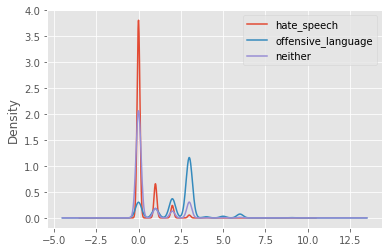

In [6]:
df_hate[['hate_speech', 'offensive_language', 'neither']].plot(kind='kde')

In [7]:
df_hate['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

<AxesSubplot:>

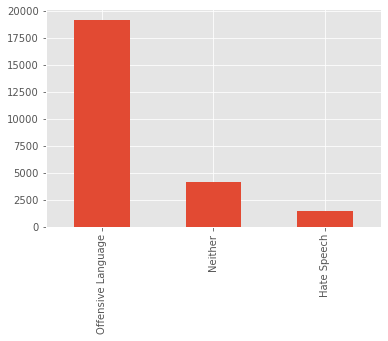

In [8]:
df_hate['class'].replace({0:'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}).value_counts().plot(kind='bar') 

<AxesSubplot:ylabel='Density'>

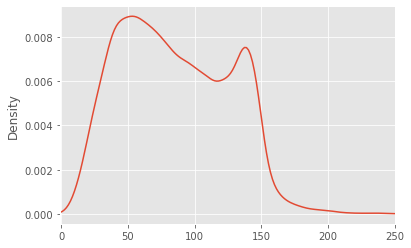

In [9]:
df_hate.tweet.str.len().plot(kind='kde', xlim=(-1,250))

In [10]:
df_hate.isna().sum().sort_values(ascending=False)

tweet                 0
class                 0
neither               0
offensive_language    0
hate_speech           0
count                 0
dtype: int64

In [11]:
df_hate.tweet.value_counts().max() # no duplicates or special values

1

### Spam Detection

In [12]:
spam_path = "res/spam/SMSSpamCollection.txt"
if os.path.exists(spam_path):
    print("Skipping download")
else:
    _ = urlretrieve(url_spam_detection, 'res/spam/temp.zip')
    with zipfile.ZipFile('res/spam/temp.zip', 'r') as zip_ref:
        zip_ref.extractall('res/spam/')

Skipping download


In [13]:
df_spam = pd.read_csv(spam_path, sep='\t', header=None)
df_spam.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df_spam[0].value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

<AxesSubplot:>

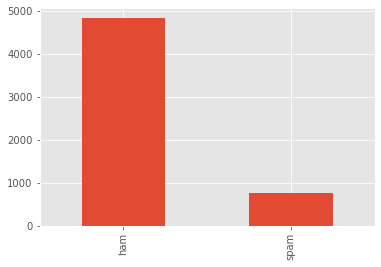

In [15]:
df_spam[0].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Density'>

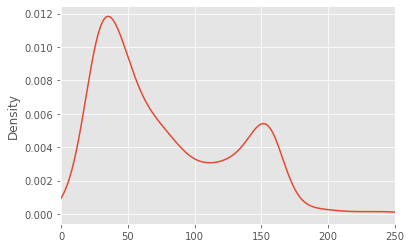

In [16]:
df_spam[1].str.len().plot(kind='kde', xlim=(-1,250))

In [17]:
df_spam.isna().sum().sort_values(ascending=False)

1    0
0    0
dtype: int64

In [18]:
dup = df_spam[1].value_counts()
dup[dup>1]

Sorry, I'll call later                                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                                    12
Ok...                                                                                                                                                                                  10
Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.     4
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st "Ur Lovely Friendship"... good morning dear                                 4
                                                                      

### Fake News

In [19]:
fake_path = "res/fake-news/cleaned.csv"
fake_fake_news_path = "res/fake-news/Fake.csv"
fake_true_news_path = "res/fake-news/True.csv"

In [20]:
df_fakes = pd.read_csv(fake_fake_news_path)
df_fakes['is_fake'] = True
df_true = pd.read_csv(fake_true_news_path)
df_true['is_fake'] = False
df_fake = pd.concat([df_fakes, df_true])[['title', 'is_fake']]
df_fake.head()

,title,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,True
1,Drunk Bragging Trump Staffer Started Russian ...,True
2,Sheriff David Clarke Becomes An Internet Joke...,True
3,Trump Is So Obsessed He Even Has Obama’s Name...,True
4,Pope Francis Just Called Out Donald Trump Dur...,True


In [21]:
df_fake.is_fake.value_counts()

True     23481
False    21417
Name: is_fake, dtype: int64

<AxesSubplot:>

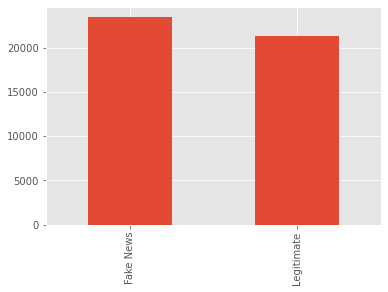

In [22]:
df_fake.is_fake.replace({True:'Fake News', False:'Legitimate'}).value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Density'>

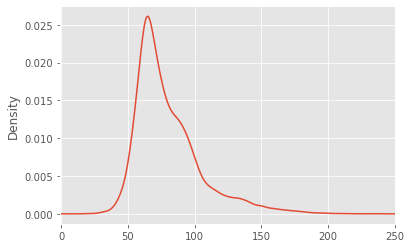

In [23]:
df_fake['title'].str.len().plot(kind='kde', xlim=(-1,250))

In [24]:
df_fake.isna().sum().sort_values(ascending=False)

is_fake    0
title      0
dtype: int64

In [25]:
dup = df_fake.title.value_counts()
dup[dup>1]

Factbox: Trump fills top jobs for his administration                                                                                   14
Factbox: Contenders for senior jobs in Trump's administration                                                                           8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                                                        8
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead                                   6
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                                               6
                                                                                                                                       ..
Introducing: Hamish “The Illusion” Patterson                                                                                            2
FOUL-MOUTHED MODEL Chrissy Teigen 

In [26]:
df_fake.to_csv(fake_path)